Estadística

**Describir un solo conjunto de datos**

Mediante una combinación de boca a boca y suerte, DataSciencester ha
crecido y ahora tiene muchísimos miembros, y el vicepresidente de
Recaudación de fondos quiere algún tipo de descripción de la cantidad de
amigos que tienen sus miembros para poder incluirla en sus discursos de
presentación.
Utilizando las técnicas del capítulo 1, es muy sencillo producir estos
datos. Pero ahora nos enfrentamos al problema de cómo describirlos. Una
descripción obvia de cualquier conjunto de datos es sencillamente los propios
datos:

In [1]:

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


Con un conjunto de datos bastante pequeño, esta podría ser la mejor
descripción. Pero, con otro más grande, resulta difícil de manejar y
probablemente opaco (imagínese tener que mirar fijamente una lista de 1 millón de números). Por esta razón, utilizamos las estadísticas para sintetizar
y comunicar las características relevantes de nuestros datos. Como primer
enfoque, ponemos los contadores de amigos en un histograma utilizando
Counter y plt.bar (véase la figura 5.1):

Text(0, 0.5, '# of people')

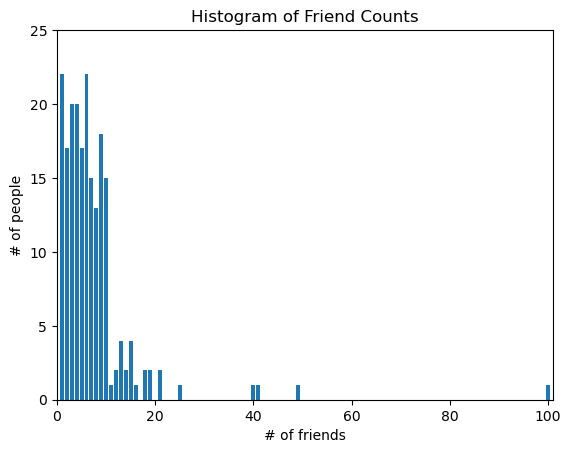

In [ ]:
from typing import List
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")


In [3]:
plt.show()

Por desgracia, sigue siendo demasiado difícil meter este gráfico en las
conversaciones. De modo que empezamos a generar algunas estadísticas; probablemente la más sencilla es el número de puntos de datos:

In [4]:
num_points = len(num_friends)               # 204

assert num_points == 204

Probablemente también estemos interesados en los valores mayor y
menor

In [ ]:

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

assert largest_value == 100
assert smallest_value == 1

Que son simplemente casos especiales de querer saber cuáles son los
valores de determinadas posiciones:

In [5]:

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49


assert smallest_value == 1
assert second_smallest_value == 1
assert second_largest_value == 49

**Tendencias centrales**

Normalmente, querremos tener alguna noción del lugar en el que nuestros
datos están centrados. Lo más habitual es que usemos la media (o promedio),
que no es más que la suma de los datos dividida por el número de datos:

In [ ]:
# standard_deviation

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333

assert 7.3333 < mean(num_friends) < 7.3334


Si tenemos dos puntos de datos, la media es simplemente el punto a mitad
de camino entre los dos. A medida que se añaden más puntos, la media se va
desplazando, pero siempre depende del valor de cada punto. Por ejemplo, si
tenemos 10 puntos de datos y aumentamos el valor de cualquiera de ellos en
1, la media aumenta en 0,1.

También estaremos interesados en ocasiones en la mediana, que es el
valor más céntrico (si el número de puntos de datos es impar) o el promedio de los dos valores más céntricos (si el número de puntos de datos es par).

Por ejemplo, si tenemos cinco puntos de datos en un vector ordenado x, la
mediana es x[5 // 2] o x[2]. Si tenemos seis puntos de datos, queremos el
promedio de x[2] (el tercer punto) y x[3] (el cuarto punto).
Tengamos en cuenta que (a diferencia de la media) la mediana no depende
por completo de cada valor de los datos. Por ejemplo, si el punto más grande
lo hacemos aún mayor (o el punto más pequeño menor), los puntos medios
no cambian, lo que significa que la mediana sí lo hace.

Escribiremos distintas funciones para los casos par e impar y las
combinaremos:

In [ ]:

# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2



Y ahora podemos calcular el número medio de amigos:

In [ ]:
assert median(num_friends) == 6

Sin duda, la media es más sencilla de calcular y varía ligeramente cuando
nuestros datos cambian. Si tenemos n puntos de datos y uno de ellos aumenta
en una cierta pequeña cantidad e, entonces la media necesariamente
aumentará en e / n (lo que consigue que la media sea susceptible a todo tipo
de trucos de cálculo). Pero, para hallar la mediana, tenemos que ordenar los
datos. Y cambiar uno de nuestros puntos de datos en una pequeña cantidad e podría aumentar la mediana también en e, en una cantidad inferior a e o en
nada en absoluto (dependiendo del resto de datos).

Nota: En realidad, existen trucos no evidentes para calcular medianas
eficazmente sin ordenar los datos. Sin embargo, están más allá del objetivo de
este libro, de modo que toca ordenar los datos.

Al mismo tiempo, la media es muy sensible a los valores atípicos de
nuestros datos. Si nuestro usuario más sociable tuviera 200 amigos (en lugar
de 100), entonces la media subiría a 7,82, mientras que la mediana seguiría
siendo la misma. Si es probable que los valores atípicos sean datos erróneos
(o no representativos del fenómeno que estemos tratando de comprender),
entonces la media puede darnos a veces una imagen equívoca. 

Por ejemplo, a
menudo se cuenta la historia de que, a mediados de los años 80, la asignatura
de la Universidad de Carolina del Norte con el salario inicial medio más alto
era geografía, principalmente debido a la estrella de la NBA (y valor atípico)
Michael Jordan.

Una generalización de la mediana es el cuantil, que representa el valor
bajo el cual reside un determinado percentil de los datos (la mediana
representa el valor bajo el cual reside el 50 % de los datos):

In [ ]:

def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13


Menos habitual sería que quisiéramos mirar la moda, es decir, el valor o
valores más comunes:

In [ ]:

def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}


Pero lo más habitual es que utilicemos la media.

**Dispersión**

Dispersión se refiere a las medidas de dispersión de nuestros datos.
Normalmente son estadísticas para las que los valores cercanos a cero
significan “no disperso en absoluto” y para las que los valores grandes (lo
que sea que eso signifique) quieren decir “muy disperso”. Por ejemplo, una
medida muy sencilla es el rango, que no es otra cosa que la diferencia entre
los elementos mayor y menor:

In [ ]:
# Rango: Representa la diferencia entre los valores máximo y mínimo de un conjunto de datos. 
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99


El rango es cero precisamente cuando el max y el min son iguales, cosa que
solo puede ocurrir si los elementos de x son todos iguales, lo que significa
que los datos están tan poco dispersos como es posible. A la inversa, si el
rango es grande, entonces el max es mucho más grande que el min y los datos
están más dispersos.

Al igual que ocurre con la mediana, en realidad el rango no depende del
conjunto de datos entero. Un conjunto de datos cuyos puntos son todos 0 o
100 tiene el mismo rango que otro cuyos valores sean 0, 100 y muchos 50.
Pero parece que el primer conjunto de datos “debería” estar más disperso.
Una medida más compleja de dispersión es la varianza, que se calcula
como:

In [ ]:

from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55


In [ ]:
# DESVIACIÓN MEDIA Media aritmética de los valores absolutos de las desviaciones con respecto a la media aritmética.

def desv_media(xs: List[float]) -> float:    
    return de_mean(xs) / len(xs)

Nota: Parece que esto sea casi la desviación cuadrática promedio respecto a
la media, salvo que estamos dividiendo por n - 1 en lugar de por n. De hecho,
cuando tratamos con una muestra de una población mayor, x_bar es solamente
una estimación de la media real, lo que significa que en promedio (x_i - x_bar)
** 2 es una subestimación de la desviación cuadrática de x_i con respecto a la
media, razón por la cual dividimos por n - 1 en lugar de por n. Consulte la
Wikipedia

Ahora, sin importar en qué unidades estén nuestros datos (por ejemplo,
“amigos”), todas nuestras medidas de tendencia central están en la misma
unidad, igual que el rango. Pero la varianza, por otro lado, tiene unidades que
son el cuadrado de las originales (es decir, “amigos al cuadrado”). Como
puede resultar difícil darle sentido a esto, a menudo recurrimos en su lugar a
la desviación estándar:

In [ ]:

import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04


Tanto el rango como la desviación estándar tienen el mismo problema de
valor atípico que vimos antes con la media. Utilizando el mismo ejemplo, si
nuestro usuario más sociable tuviera realmente 200 amigos, la desviación
estándar sería 14,89 (¡más del 60 % más elevada!).
Una alternativa más robusta calcula la diferencia entre los percentiles 75 y
25:

In [ ]:

def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6



Que apenas se ve afectada por una pequeña cantidad de valores atípicos.